# Microsoft Movie Studio Analysis and Recommendations

**Author:** Ben Ochoro
***
July 2023

## Overview
Microsoft has decided to venture into the film industry .Having created a new movie studio and with no information into this particular brand of business,there's need for actionable insight.This is necessary to give Microsoft a guideline into what movies to make and what markets to explore.

The project explored datasets acquired from IMDB to carry out an exploratory data analysis. The most prevalent metric used is the gross income generated by different genres in both domestic and foreign markets together with the ratings of the various film genres released in the past few years.




## Business Problem

Microsoft need guidance in creation of original video content and  navigating the film industry having invested into a new movie studio.Due to the company's lack of prior knowledge in film production,this project explores the various types of film genres currently doing well in the box office. The aim is to give actionable insight to the head of Microsoft's new movie studio to make a decision on what type of films to create. 

This analysis aims to answer the following questions ;
1. Which genres of movies had the highest average ratings
2. Which genres generated the highest gross incomes in both domestic and foreign markets
3. The total count of movies released per genre
4. Gross income by the year
5. Correlation between the average rating and gross income

Answering these business questions will give further insight into what movies to venture into.

## The Data 
The data used for this analysis was acquired from IMDB and the datasets are listed below :

*bom.movie_gross

*imdb.title.ratings

*imdb.title.basics

The target variables are gross income(domestic and foreign),year,average ratings,total movies per genre.



In [1]:
#Import standard packages and load libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading our datasets
gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
title_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')


In [3]:
# look at the top 5 and bottom 5 rows for a better understanding of our dataset
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
gross_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [5]:
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
title_df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [7]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
ratings_df.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


# Data Understanding

In [96]:
#summary information about columns in our dataframe
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [10]:
#column names in our dataframe
gross_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [11]:
#rows and columns count in our dataframe
gross_df.shape

(3387, 5)

In [12]:
#statistical and numerical summary of our dataset 
gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [13]:
#summary information about columns in our dataframe
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
#column names in our dataframe
title_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [15]:
#rows and columns count in our dataframe
title_df.shape

(146144, 6)

In [16]:
#statistical and numerical summary of our dataset 
title_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [17]:
#summary information about columns in our dataframe
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
#column names in our dataframe
ratings_df.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [19]:
#rows and columns count in our dataframe
ratings_df.shape

(73856, 3)

In [20]:
#statistical and numerical summary of our dataset 
ratings_df.describe(include='all')

,tconst,averagerating,numvotes
count,73856,73856.000000,7.385600e+04
unique,73856,NaN,NaN
top,tt3252998,NaN,NaN
freq,1,NaN,NaN
mean,NaN,6.332729,3.523662e+03
std,NaN,1.474978,3.029402e+04
min,NaN,1.000000,5.000000e+00
25%,NaN,5.500000,1.400000e+01
50%,NaN,6.500000,4.900000e+01
75%,NaN,7.400000,2.820000e+02


# Data Cleaning

## Missing Values Check

In [21]:
#Total missing rows per column for the movie gross dataset
missing_values = gross_df.isna().sum()
missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [22]:
#Total missing rows per column for the basic title dataset
missing_values2 = title_df.isna().sum()
missing_values2

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [23]:
#Total missing rows per column for the ratings dataset
missing_values3 = ratings_df.isna().sum()
missing_values3

tconst           0
averagerating    0
numvotes         0
dtype: int64

  Gross dataframe:
  
1.Two columns 'title' and 'year' had no missing values.

2.Three columns; 'foreign_gross' had 1350 missing values,'domestic_gross' had 28 missing values while 'studio' had 5 missing values.

-To handle the missing values ;the 5 missing values in 'studio' were replaced with 'NA' being an string/object type ,while the missing values in 'foreign_gross' and 'domestic_gross' were replaced with a value '0' since they can be represented as integers.

  Title dataframe:
  
1.Had three columns ;'tconst','primary_title' and 'start_year' with no missing values.

2.The values in the 'primary_title' are used to replace the missing values in the 'original_title' column which were 21.

3. For the 'genres' column,we had 5408 missing values but we need it for our analysis and solution of the business question so we dropped the rows with missing values.

4. The 'runtime_minutes'column had missing values .We opted to replace the missing rows with the median rather than the mean since it isn't as influenced by outliers compared to the former.

  Ratings dataframe:
  
1.Had no missing values



#### For the title dataframe:

In [24]:
# Dropping missing values for the'genres' column of title dataset
title_df = title_df.dropna(subset=['genres'])
title_df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [25]:
#sum of missing values per column
missing_values2 = title_df.isna().sum()
missing_values2

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [26]:
# replacing the missing values of the 'runtime_minutes' with the median value
columns = ['runtime_minutes']
def fill_numeric_missing(data, cols):
    for col in cols:
        data[col].fillna(data[col].median(),inplace=True)

fill_numeric_missing(title_df, columns)

In [27]:
# values in the 'primary_title' are used to replace the missing values in the 'original_title' column
title_df['original_title'] = title_df['original_title'].fillna(title_df['primary_title'])

#### For the gross dataframe:

In [28]:
# The missing values in 'studio' column were replaced with 'NA'
gross_df['studio'] = gross_df['studio'].fillna('NA')
gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [29]:
#Replace missing values in 'foreign_gross' and 'domestic_gross' with a value '0'
gross_df['foreign_gross'] = gross_df['foreign_gross'].fillna(0.0)
gross_df['domestic_gross'] = gross_df['domestic_gross'].fillna(0.0)
gross_df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


## Duplicate Data Check

#### gross dataframe 

In [30]:
#checking for duplicates tally in the gross df
gross_df.duplicated().sum()

0

In [31]:
# Check for duplicates in the gross df usinf 'title' column
gross_df[gross_df.duplicated(keep = False , subset= ['title'])].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,0,2017


There's no duplicate rows in the gross dataframe and the above movies are not considered duplicates since they contain different data in their columns.

#### title dataframe

In [32]:
# checking for duplicates tally in the title df
title_df.duplicated(keep = False).sum()

0

In [33]:
# check for duplicates in title df using 'primary_title'and 'runtime_minutes'columns
title_df[title_df.duplicated(keep = False ,subset =['primary_title','runtime_minutes'])].sort_values(by='primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography
10141,tt1588853,100 Years,100 Years,2011,87.0,Documentary
89506,tt5174640,100 Years,100 Years,2115,87.0,Drama
110950,tt6474850,11,11,2017,87.0,"Action,Thriller"
...,...,...,...,...,...,...
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66990,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
98200,tt5737878,Ódio,Ódio,2016,87.0,Drama


~title df contains duplicates based on the primary_title column and the run_time minutes.

~To keep integrity of the data,duplicate records will be dropped while maintaining the records with the least number of missing values.

In [34]:
# check for duplicates in title df using 'primary_title'and 'start_year'columns
title_duplicates = title_df[title_df.duplicated(keep = False ,subset =['primary_title','start_year'])].sort_values(by='primary_title')
title_duplicates

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary"
106201,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary"
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography
20394,tt1855110,180,180,2011,121.0,"Drama,Romance"
...,...,...,...,...,...,...
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66994,tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"
66990,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary"


~title df contains duplicates based on the primary_title column and the start_year columns.

~To keep integrity of the data,duplicate records will be dropped while maintaining the records with the least number of missing values.

In [35]:
# create a new column 'missing_count' to contain the sum of missing values in each row
missing_count = title_df.isnull().sum(axis=1)
missing_count

0         0
1         0
2         0
3         0
4         0
         ..
146138    0
146139    0
146140    0
146141    0
146143    0
Length: 140736, dtype: int64

In [36]:
# sort title df by values of new 'missing' column and 'primary_title'
title_df = title_df.assign(missing = title_df.isnull().sum(axis=1)).sort_values(by=['primary_title', 'missing'], ascending=False)
title_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,missing
76481,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.0,"Comedy,Drama",0
102502,tt5997078,împetu,împetu,2017,87.0,Documentary,0
139058,tt8976950,élèctions piege à cons,élèctions piege à cons,2014,87.0,Comedy,0
61401,tt3547074,è solo questione di tempo,è solo questione di tempo,2013,72.0,Comedy,0
61849,tt3566826,è solo questione di punti di vista,è solo questione di punti di vista,2012,103.0,"Action,Adventure,Comedy",0
...,...,...,...,...,...,...,...
77936,tt4470336,#50Fathers,#50Fathers,2015,132.0,Comedy,0
52892,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",0
131857,tt8219776,#5,#5,2018,87.0,Documentary,0
37039,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,0


In [37]:
#check duplicates in 'start_year' and 'primary_title' column

title_df[title_df.duplicated(keep = False ,subset =['primary_title','start_year'])]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,missing
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0
66990,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",0
...,...,...,...,...,...,...,...
24194,tt1979163,180,180,2011,107.0,"Comedy,Drama",0
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography,0
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography,0
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary",0


In [38]:
# drop duplicate values while keeping entry with least missing values,drop missing column
title_df = title_df.drop_duplicates(keep='first', subset=['primary_title','start_year']).drop(columns='missing')


In [39]:
# Drop duplicates based on 'primary_title' and 'start_year' while keeping records with the least missing values
df_unique = title_df.drop_duplicates(subset=['primary_title', 'start_year'], keep='first')

In [40]:
# show dataframe after dropping duplicates
print("\nDataFrame after dropping duplicates:")
print(df_unique)


DataFrame after dropping duplicates:
           tconst                       primary_title  \
76481   tt4373884                        Šiška Deluxe   
102502  tt5997078                              împetu   
139058  tt8976950              élèctions piege à cons   
61401   tt3547074           è solo questione di tempo   
61849   tt3566826  è solo questione di punti di vista   
...           ...                                 ...   
77936   tt4470336                          #50Fathers   
52892   tt3120962                                  #5   
131857  tt8219776                                  #5   
37039   tt2346170                    #1 Serial Killer   
13871   tt1699720               !Women Art Revolution   

                            original_title  start_year  runtime_minutes  \
76481                         Siska Deluxe        2015            108.0   
102502                              împetu        2017             87.0   
139058              élèctions piege à cons        20

#### ratings dataframe

In [41]:
# checking for duplicates tally in the ratings df
ratings_df.duplicated(keep = False).sum()

0

In [42]:
# check for duplicates in ratings df using 'tconst' column
ratings_df[ratings_df.duplicated(keep = False ,subset =['tconst'])].sort_values(by='tconst')

,tconst,averagerating,numvotes


The ratings df has no duplicates.

## Filter Foreign Values

In [43]:
# Checking years greater than 2023 in gross df
gross_df[gross_df['year'] > 2023]

,title,studio,domestic_gross,foreign_gross,year


The gross df ,'year' column contains no values that lie outside the range of the current year.

In [44]:
# Checking years greater than 2023 in title df
title_df[title_df['start_year'] > 2023]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,87.0,Fantasy
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,87.0,"Adventure,Family,Fantasy"
96592,tt5637536,Avatar 5,Avatar 5,2027,87.0,"Action,Adventure,Fantasy"
52213,tt3095356,Avatar 4,Avatar 4,2025,87.0,"Action,Adventure,Fantasy"
89506,tt5174640,100 Years,100 Years,2115,87.0,Drama


In [45]:
# Drop records with 'start_year' greater than 2023 in title df
title_df = title_df[title_df['start_year'] <= 2023]
title_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
76481,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.0,"Comedy,Drama"
102502,tt5997078,împetu,împetu,2017,87.0,Documentary
139058,tt8976950,élèctions piege à cons,élèctions piege à cons,2014,87.0,Comedy
61401,tt3547074,è solo questione di tempo,è solo questione di tempo,2013,72.0,Comedy
61849,tt3566826,è solo questione di punti di vista,è solo questione di punti di vista,2012,103.0,"Action,Adventure,Comedy"
...,...,...,...,...,...,...
77936,tt4470336,#50Fathers,#50Fathers,2015,132.0,Comedy
52892,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy"
131857,tt8219776,#5,#5,2018,87.0,Documentary
37039,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror


## Change Data Types

In [46]:
# information containing data types of the gross df
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [47]:
# convert 'foreign_gross' column data type from object to float
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(",","").apply(float)
gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [48]:
# information containing data types of the title df
title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138921 entries, 76481 to 13871
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           138921 non-null  object 
 1   primary_title    138921 non-null  object 
 2   original_title   138921 non-null  object 
 3   start_year       138921 non-null  int64  
 4   runtime_minutes  138921 non-null  float64
 5   genres           138921 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.4+ MB


In [49]:
# information containing data types of the ratings df
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Merge dataframes

In [50]:
# Using an inner join to merge our title and ratings dataframes
joined_df = title_df.merge(ratings_df , on = 'tconst',how='inner')
joined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.0,"Comedy,Drama",6.3,384
1,tt3509772,ärtico,ärtico,2014,78.0,Drama,6.6,101
2,tt5217114,à propos: philosophie,à propos: philosophie,2016,80.0,Documentary,8.2,5
3,tt4422510,"Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,4.3,88
4,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",4.8,51
...,...,...,...,...,...,...,...,...
72295,tt7853996,#ALLMYMOVIES,#ALLMYMOVIES,2015,87.0,Documentary,8.3,21
72296,tt5255986,#66,#66,2015,116.0,Action,5.3,18
72297,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",6.8,6
72298,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,5.6,40


In [51]:
# rename 'primary_title' column to title
joined_df.rename(columns = {'primary_title':'title'}, inplace = True)
joined_df

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.0,"Comedy,Drama",6.3,384
1,tt3509772,ärtico,ärtico,2014,78.0,Drama,6.6,101
2,tt5217114,à propos: philosophie,à propos: philosophie,2016,80.0,Documentary,8.2,5
3,tt4422510,"Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,4.3,88
4,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",4.8,51
...,...,...,...,...,...,...,...,...
72295,tt7853996,#ALLMYMOVIES,#ALLMYMOVIES,2015,87.0,Documentary,8.3,21
72296,tt5255986,#66,#66,2015,116.0,Action,5.3,18
72297,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",6.8,6
72298,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,5.6,40


In [52]:
# on the title column,merge gross_df and joined_df using inner join
film_df = joined_df.merge(gross_df , on = 'title',how='inner')
film_df

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016
1,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016
2,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",5.2,52396,Sony,80400000.0,89500000.0,2011
3,tt2784512,Zombeavers,Zombeavers,2014,77.0,"Action,Adventure,Comedy",4.8,14825,Free,14900.0,NaN,2015
4,tt1562872,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,2011,155.0,"Comedy,Drama",8.1,58912,Eros,3100000.0,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2943,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,NaN,2015
2944,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,NaN,2012
2945,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016
2946,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,NaN,2014


In [53]:
# checking for information about our columns
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2948 entries, 0 to 2947
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2948 non-null   object 
 1   title            2948 non-null   object 
 2   original_title   2948 non-null   object 
 3   start_year       2948 non-null   int64  
 4   runtime_minutes  2948 non-null   float64
 5   genres           2948 non-null   object 
 6   averagerating    2948 non-null   float64
 7   numvotes         2948 non-null   int64  
 8   studio           2948 non-null   object 
 9   domestic_gross   2948 non-null   float64
 10  foreign_gross    1782 non-null   float64
 11  year             2948 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 299.4+ KB


In [54]:
# checking the name of our columns
film_df.columns

Index(['tconst', 'title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'studio', 'domestic_gross',
       'foreign_gross', 'year'],
      dtype='object')

In [55]:
# shows numerical data of our data frame
film_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,2948.000000,2948.000000,2948.000000,2.948000e+03,2.948000e+03,1.782000e+03,2948.000000
mean,2013.781547,107.273745,6.459701,6.312455e+04,3.012333e+07,7.782452e+07,2014.074288
std,2.466698,19.892450,1.000864,1.266737e+05,6.636590e+07,1.378899e+08,2.441632
min,2010.000000,3.000000,1.600000,5.000000e+00,0.000000e+00,6.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.564500e+03,1.260000e+05,4.525000e+06,2012.000000
50%,2014.000000,105.000000,6.600000,1.399950e+04,1.800000e+06,2.090000e+07,2014.000000
75%,2016.000000,118.000000,7.100000,6.649750e+04,3.152500e+07,8.132500e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


In [56]:
# check for duplicates
film_df.duplicated().sum()

0

In [57]:
# convert NaN values to '0'in the foreign_gross column
film_df['foreign_gross'] = film_df['foreign_gross'].fillna(0)
film_df

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016
1,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016
2,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",5.2,52396,Sony,80400000.0,89500000.0,2011
3,tt2784512,Zombeavers,Zombeavers,2014,77.0,"Action,Adventure,Comedy",4.8,14825,Free,14900.0,0.0,2015
4,tt1562872,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,2011,155.0,"Comedy,Drama",8.1,58912,Eros,3100000.0,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
2943,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,0.0,2015
2944,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,0.0,2012
2945,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016
2946,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,0.0,2014


For the purpose of our analysis of the total gross income made my the movies in domestic and foreign markets, we add a new column to our dataset and label it 'total gross' . This is achieved by sum of the domestic gross and foreign gross columns.

In [58]:
# create new column 'total_gross'
film_df['total_gross'] = film_df['domestic_gross'] + film_df['foreign_gross']
film_df

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
1,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016,5.670000e+07
2,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",5.2,52396,Sony,80400000.0,89500000.0,2011,1.699000e+08
3,tt2784512,Zombeavers,Zombeavers,2014,77.0,"Action,Adventure,Comedy",4.8,14825,Free,14900.0,0.0,2015,1.490000e+04
4,tt1562872,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,2011,155.0,"Comedy,Drama",8.1,58912,Eros,3100000.0,0.0,2011,3.100000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,0.0,2015,1.100000e+04
2944,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,0.0,2012,2.030000e+05
2945,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,1.102000e+08
2946,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,0.0,2014,5.390000e+04


The genres column has numerous categories on a single row . To separate them we use the .explode function and then reset the index.

In [65]:
# Split the 'genres' column into multiple rows with one category in each row
film_split = film_df.assign(genres= film_df['genres'].str.split(','))

# Explode the 'genre' column to create separate rows for each category
film_split = film_split.explode('genres', ignore_index=True)
film_split


,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,tt2948356,Zootopia,Zootopia,2016,108.0,Adventure,8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
1,tt2948356,Zootopia,Zootopia,2016,108.0,Animation,8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
2,tt2948356,Zootopia,Zootopia,2016,108.0,Comedy,8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
3,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy,4.7,59914,Par.,28800000.0,27900000.0,2016,5.670000e+07
4,tt1222817,Zookeeper,Zookeeper,2011,102.0,Comedy,5.2,52396,Sony,80400000.0,89500000.0,2011,1.699000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,Drama,7.1,6848,FM,53900.0,0.0,2014,5.390000e+04
6854,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,War,7.1,6848,FM,53900.0,0.0,2014,5.390000e+04
6855,tt2614684,'71,'71,2014,99.0,Action,7.2,46103,RAtt.,1300000.0,355000.0,2015,1.655000e+06
6856,tt2614684,'71,'71,2014,99.0,Drama,7.2,46103,RAtt.,1300000.0,355000.0,2015,1.655000e+06


In [74]:
# check value count for genres
film_split['genres'].value_counts()

Drama          1718
Comedy          918
Action          638
Romance         464
Thriller        439
Adventure       436
Crime           379
Biography       282
Horror          230
Documentary     216
Mystery         206
Fantasy         166
Animation       151
Sci-Fi          135
History         134
Family          114
Music            89
Sport            52
War              50
Western          21
Musical          18
News              2
Name: genres, dtype: int64

In [67]:
# reset the index after exploding
film_df = film_df.reset_index(drop=True)


# Data Visualization

### Total Movie count distribution per genre

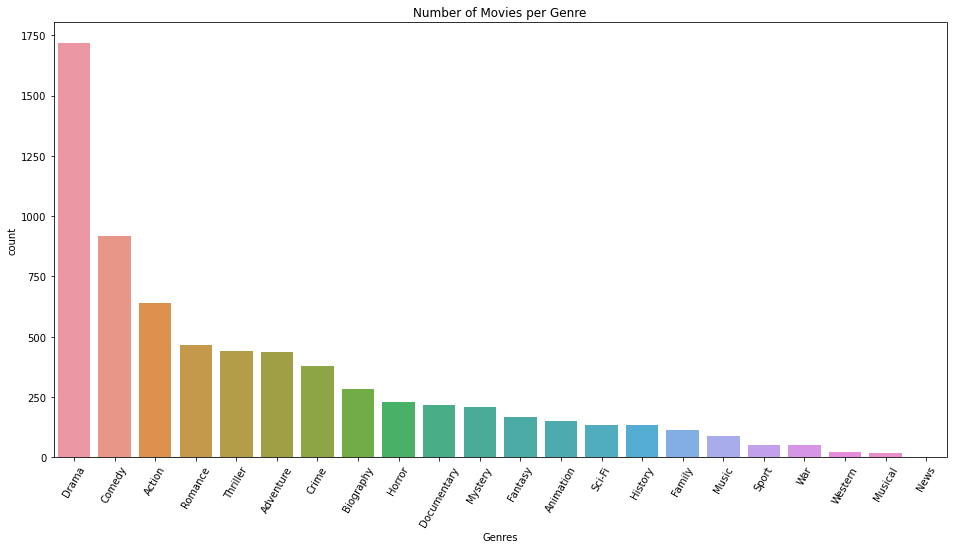

In [83]:
# A countplot showing total films released per genre
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.countplot(x=film_split['genres'], order=film_split['genres'].value_counts().index)
plt.xlabel('Genres')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=60)
plt.show()


This countplot shows the total count of movies released per genre .It gives us an insight into the most and least released movie count per genre ,with the most being Drama ,comedy and action  categories .This is probably because these are among the most commonly produced type of movies.The least released movie genres are News,Musical and western genres probably because the media became saturated with them in the previous years and their audience demand is not high.

### Average rating and total gross income

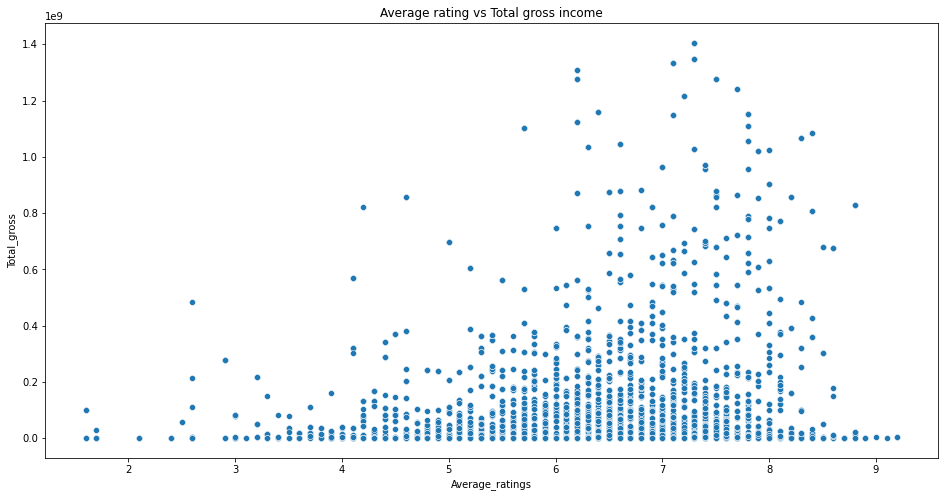

In [80]:
# scatter plot to show the correlation between the average rating and the total gross income .
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(x=film_split['averagerating'], y=film_split['total_gross'], ax=ax)
plt.xlabel('Average_ratings')
plt.ylabel('Total_gross')
plt.title('Average rating vs Total gross income')
plt.show()

The average rating and the total gross income do not have a clearly defined correlation or effect on one another . We can however see that movies with the low average ratings had an equally low total gross income as compared to those with average and above average average ratings. This could be attributed to the fact that genres with low ratings do not entirely attract a bigger audience resulting to a relatively low gross income.


### Total gross income per genre

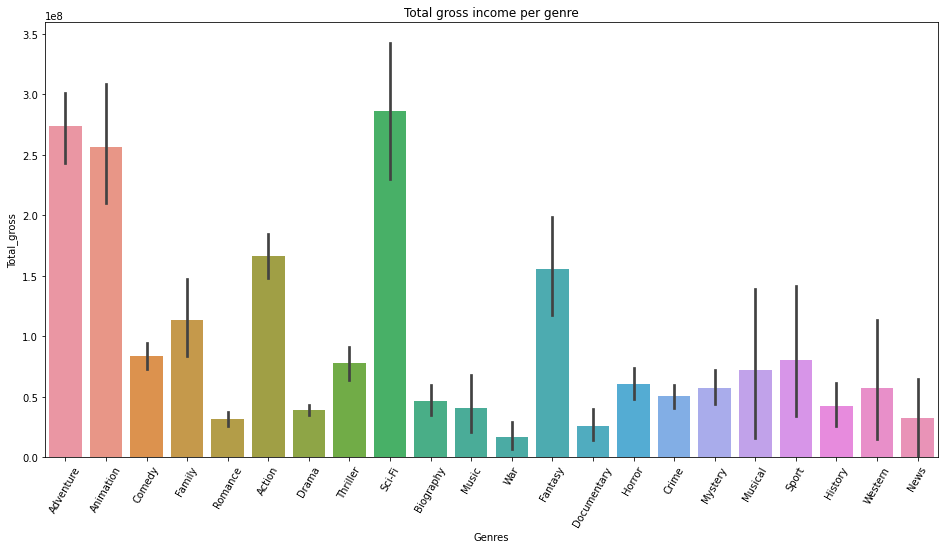

In [82]:
#Barplot showing the total gross generated by each genre 
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x=film_split['genres'], y=film_split['total_gross'], ax=ax)
plt.xlabel('Genres')
plt.ylabel('Total_gross')
plt.title('Total gross income per genre')
plt.xticks(rotation=60)
plt.show()

The genres that generated the highest gross income are Sci-Fi,Adventure and Animation genres.These are common and wildly popular since these markets have been around longer especially in the box office among other reasons that we'll explore such as ratings ,while War,Documentary and Romance genres had the least total gross income generated among the genres.

### Movie genres and average rating 

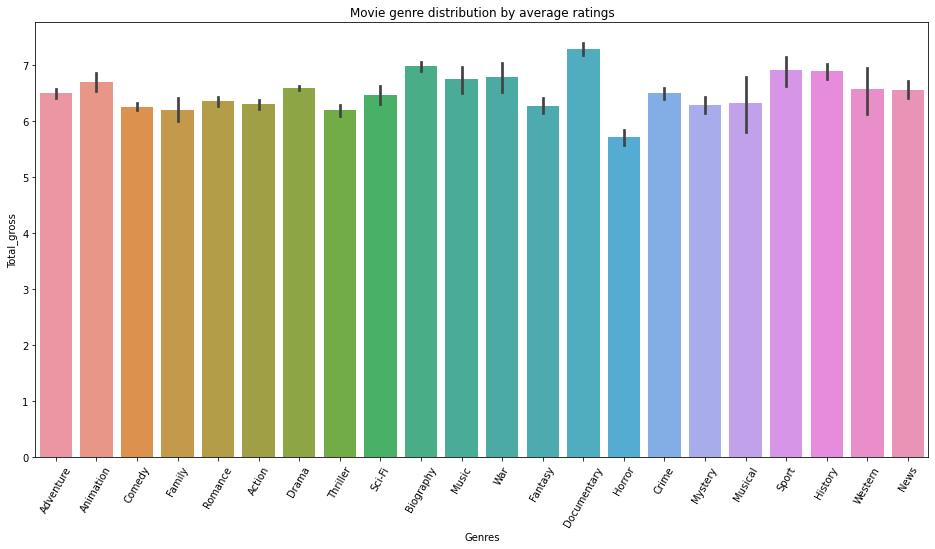

In [89]:
#Barplot showing movie genres and their average ratings 
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x=film_split['genres'], y=film_split['averagerating'], ax=ax)
plt.xlabel('Genres')
plt.ylabel('Total_gross')
plt.title('Movie genre distribution by average ratings')
plt.xticks(rotation=60)
plt.show()

The genres with the highest average ratings are Documentary and Biography while least average rated genres are horror and thriller. The distribution of the average ratings per genre as is really close. 

### Gross incomes and start year

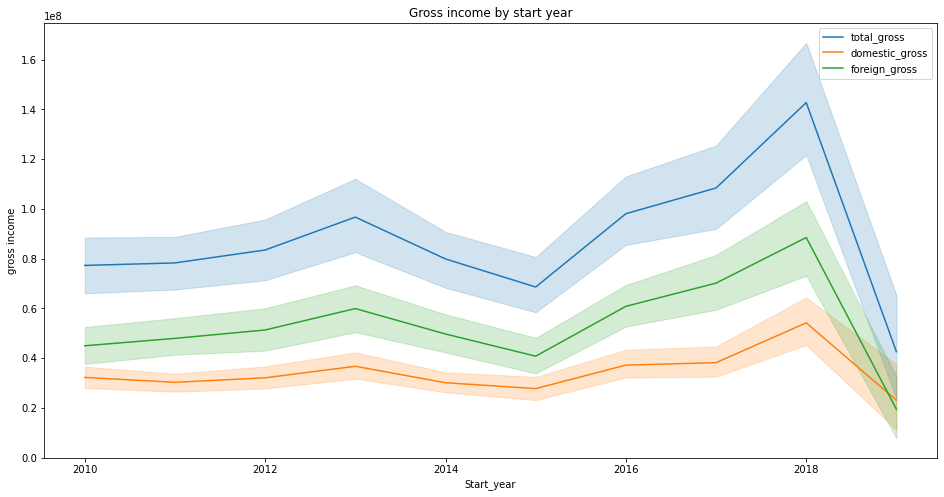

In [95]:
#A lineplot showing gross income by start year
fig,ax = plt.subplots(figsize=(16,8))
ax = sns.lineplot(x=film_split['start_year'], y=film_split['total_gross'],label ='total_gross',ax=ax)
ax = sns.lineplot(x=film_split['start_year'], y=film_split['domestic_gross'],label ='domestic_gross', ax=ax)
ax = sns.lineplot(x=film_split['start_year'], y=film_split['foreign_gross'],label ='foreign_gross', ax=ax)
plt.xlabel('Start_year')
plt.ylabel('gross income')
plt.title('Gross income by start year')
plt.show()

According to our lineplot ,the start_year 2018 experienced a peak in gross income in both domestic and foreign markets ,which resulted to a relative peak in the total gross income.


After 2018,there was a sharp drop in gross income levels in both domestic and foreign markets attributed to various reasons ,resulting to a relative drop in total gross in both markets.This could be attributed to the rise in customers buying on-demand and digital copies of films as well as the rise in streaming services and platforms such as Netflix,Amazon and Hulu.

## Conclusion.


1. The highest gross income is generated by Sci-Fi,Adventure and Animation genres.These are common and wildly popular.

2. War,Documentary and Romance genres had the least total gross income generated gross income.

3. Most number of movies were produced in the Drama ,comedy and action categories .However we can argue that these are popular movie genres.The least released movie genres are News,Musical and western genres

4. The average rating and the total gross income do not have a clearly defined correlation or effect on one another . We can however see that movies with the low average ratings had an equally low total gross income as compared to those with average and above average average ratings.

5. The start_year 2018 experienced a peak in gross income in both domestic and foreign markets ,which resulted to a relative peak in the total gross income.

6. After 2018,there was a sharp drop in gross income levels in both domestic and foreign markets,resulting to a relative drop in total gross in both markets.



## Recommendations


1. Microsoft should consider venturing into production of movie genres that produced the highest gross income ,that is ,Sci-Fi,Adventure and animation .This is because these particular genres have a bigger audience and appeal and the return on investment will definately be high.

2. High average rating does not necessarily translate to higher gross income according to our data. Therefore Microsoft shouldn't really employ movie ratings as metric for considering what movie to venture into.

3. Microsoft should look more into the foreign market demand as compared to the domestic demand. This is because of higher returns experienced by movies in the foreign markets compared to the domestic market. Some movie genres also generated domestic gross income and no foreign gross , but since the foreign gross is relatively higher than domestic gross across our dataset,it would be ideal to focus on the foreign maarket demands.

4. Based solely on the genre with the most number of movies produced , which translates to genres with the most audience, Microsoft could consider films in the Drama ,comedy and action genres since they're arguably more popular with the audience.

5. There was a sharp drop in film gross income after 2018 in both domestic and foreign markets. Market research indicates that in the same period, the rise in digital copies production of films as well as the rise in streaming services and platforms such as Netflix could have been a contributing factor.Microsoft should consider these platforms when releasing their movies to the audience.

## Summary

The analysis focuses on what type of movies are currently doing well and use the information to make a recommendation to Microsoft as to what type of movies to make in the new production studio.The parameters used for this analysis such as gross income are affected by other multiple parameters such as marketing ,advertisement,budget which can give further insight into what into predicting what direction to take. 